In [2]:
# Importing libraries
import pandas as pd 
import seaborn as sns

In [3]:
# Reading datasets

data = pd.read_excel("/content/drive/MyDrive/DSA/ Activity Data sets/Week 4/Telco-Customer-Churn.xlsx")

In [4]:
# Checking data
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking for null values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values present in the dataset

In [7]:
data.shape

(7043, 21)

1. Compare churn count with respect to gender.

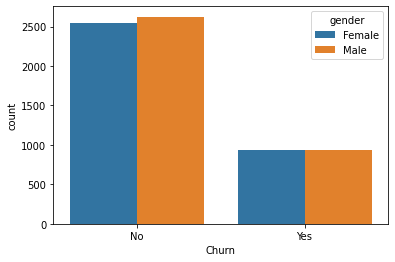

In [8]:
sns.countplot(x="Churn",hue = "gender",data = data)

In [9]:
pd.crosstab(data["gender"],data["Churn"])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [24]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are 1869 people hwo droped connection out of which 939 are females and 930 are male consumers.5147 retained there connection including 2549 feamle and 2625 male.

2. Find out how many female senior citizens there in the dataset

In [10]:
data['gender'].value_counts(ascending=True)

Female    3488
Male      3555
Name: gender, dtype: int64

In [13]:
pd.crosstab(data['gender'],data['SeniorCitizen'])

SeniorCitizen,0,1
gender,,
Female,2920,568
Male,2981,574


Out of 3488 female consumers 568 of them are senior citizen.

3. Compare 'tenure' with 'Total Charges'


In [11]:
data[['tenure','TotalCharges']]

,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.50
7039,72,7362.90
7040,11,346.45
7041,4,306.60


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


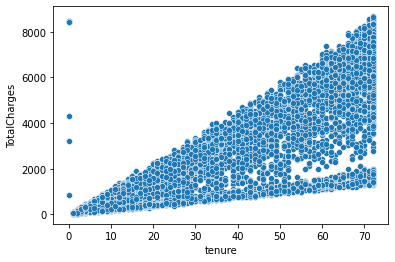

In [12]:
sns.scatterplot(data['tenure'],data['TotalCharges'])

Those who are using connection for a longer duration spend more money.

4. Find out which contract is preferred by the senior citizen.


In [19]:
pd.crosstab(data['SeniorCitizen'],data['Contract'])

Contract,Month-to-month,One year,Two year
SeniorCitizen,,,
0,3068,1283,1550
1,807,190,145


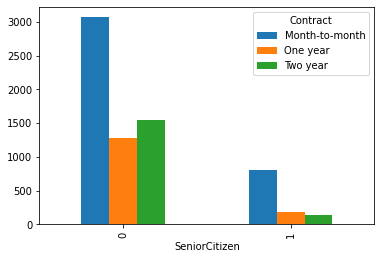

In [28]:
pd.crosstab(data['SeniorCitizen'],data['Contract']).plot(kind = 'bar')

Senior citized preffer Month-to-Month contract method

5. Comment on your finds on Payment Method?


In [26]:
data['PaymentMethod'].describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [29]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In pyment method there are four unique values 

*   Electronic check
*   Mailed check
*   Bank transfer (automatic)
*   Credit card (automatic)
Mostly used payment method is Electronic check


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


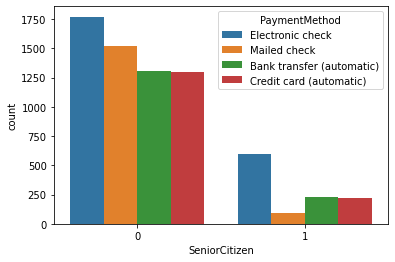

In [31]:
sns.countplot(data['SeniorCitizen'],hue = data['PaymentMethod'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


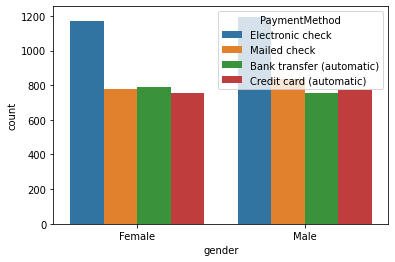

In [32]:
sns.countplot(data['gender'],hue = data['PaymentMethod'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


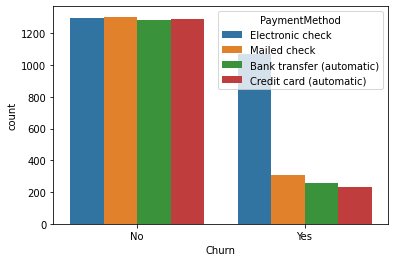

In [33]:
sns.countplot(data['Churn'],hue = data['PaymentMethod'])